# Chapter 5 시계열 회귀 모델

목표 예상변수(forecast variable) y 는 때때로 회귀선, 종속 변수, 또는 피설명 변수

예측변수(predictor variables)  x 는 종종 회귀자, 독립 변수, 설명 변수

## 5.1 선형 모델

### 단순 선형 회귀


회귀 모델이 목표 예상변수(forecast variable)  y 와 하나의 예측변수(predictor variable)  x 사이의 선형 관계

\begin{align*}
y_t = \beta_0 + \beta_1 x_t + \varepsilon_t.
\end{align*}


Figure 5.1: 단순 선형 회귀 모델로 얻은 예제 데이터.
![](https://otexts.com/fppkr/fpp_files/figure-html/SLRpop1-1.png)

“오차(error)”라는 단어는 실수를 의미하는 것이 아니라, 관측값이 기본 직선 모델로부터 얼마나 떨어져 있는지를 의미
 

### 예제: 미국 소비 지출

1970 Q1부터 2016 Q3까지 미국의 실제 개인 소비 지출(real personal consumption expenditure),y ,과 실제 개인 가처분소득(real personal disposable income),x ,의 분기별 백분율 변화량 시계열

In [4]:
library(fpp2)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: forecast
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Loading required package: fma
Loading required package: expsmooth


Figure 5.2: 미국 개인 소비 지출 및 개인 소득의 백분율 변화.

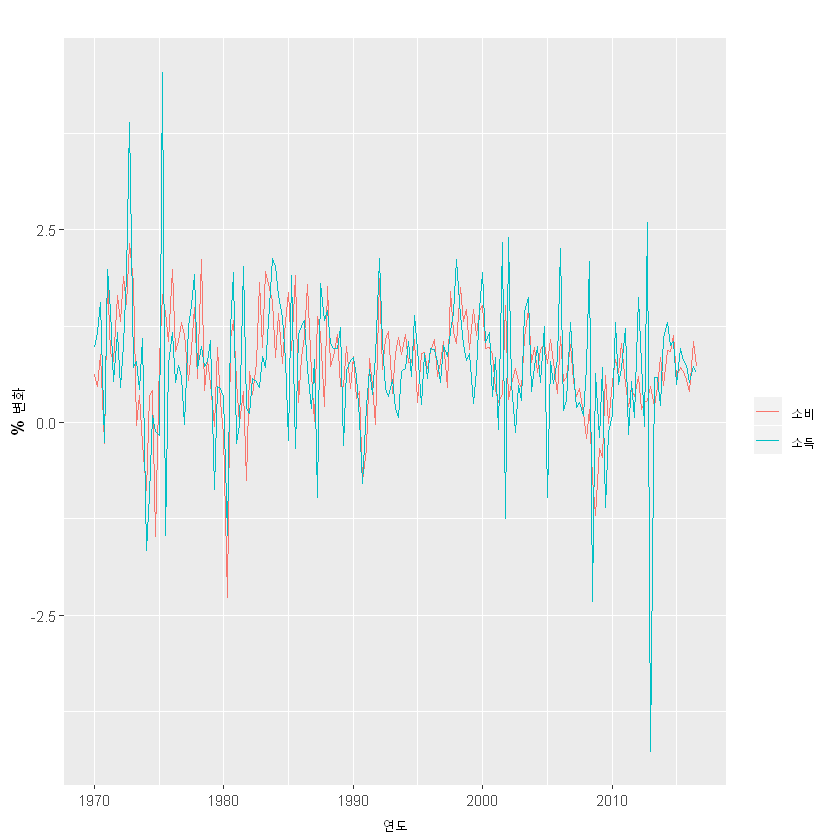

In [5]:
colnames(uschange)[1:2] <- c("소비", "소득")
autoplot(uschange[,c("소비", "소득")]) +
  ylab("% 변화") + xlab("연도") +
  guides(colour=guide_legend(title=" "))

그림 5.3은 소득 변화에 따른 소비 변화 산점도(scatterplot)를 추정된 회귀선과 함께 보여줍니다.


\begin{align*}
 \hat{y}_t=0.55 + 0.28x_t.
\end{align*}



Figure 5.3: 소비 지출의 분기별 변화 대 개인 소득의 분기별 변화의 산점도와 적합 회귀선.

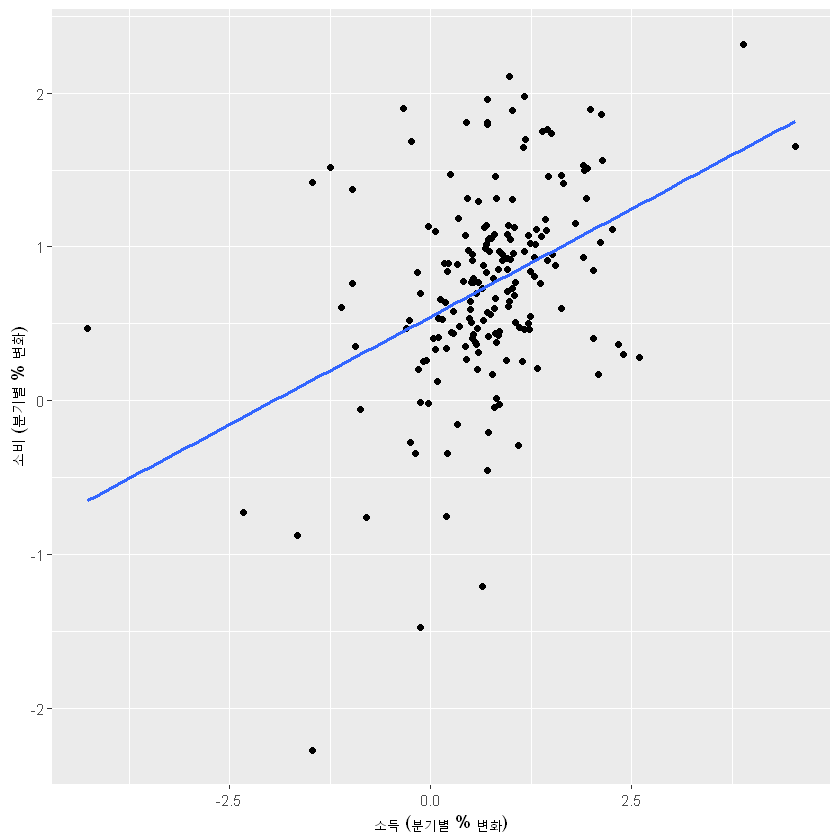

In [6]:
uschange %>%
  as.data.frame() %>%
  ggplot(aes(x=소득, y=소비)) +
    ylab("소비 (분기별 % 변화)") +
    xlab("소득 (분기별 % 변화)") +
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

R에서 tslm 함수로 추정

In [7]:
tslm(소비 ~ 소득, data=uschange)


Call:
tslm(formula = 소비 ~ 소득, data = uschange)

Coefficients:
(Intercept)         소득  
     0.5451       0.2806  


적합선(fitted line)은 양(+)의 기울기이며 소득과 소비 사이의 양의 관계를 반영

기울기 계수는  x 가 1만큼 증가할 때(개인 가처분 소득이 1퍼센트 증가할 때) y가 평균적으로 증가하는 것(개인 소비 지출이 평균적으로 0.28퍼센트 증가하는 것)

### 다중 선형 회귀

그림 5.4은 미국 소비 지출 예측에 유용할 수 있는 추가적인 예측변수(predictor vvariable)로 산업 생산, 개인 저축의 분기별 백분율 변화, 분기별 실업률(이것은 정의상 백분율) 변화 등이 있음




Figure 5.4: 미국 산업 생산, 개인 저축, 실업률 분기별 백분율 변화를 1960년 1분기부터 2016년 3분기까지 나타낸 것.
![](https://otexts.com/fppkr/fpp_files/figure-html/MultiPredictors-1.png)

그림 5.5 은 5개 변수의 산점도 행렬(scatterplot matrix)로  산점도(scatter plot)는 소득과 산업 생산과의 양의 관계, 저축과 실업률과의 음의 관계를 나타냄.


Figure 5.5: 미국 소비 지출 산점도 행렬과 네 가지 예측변수.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


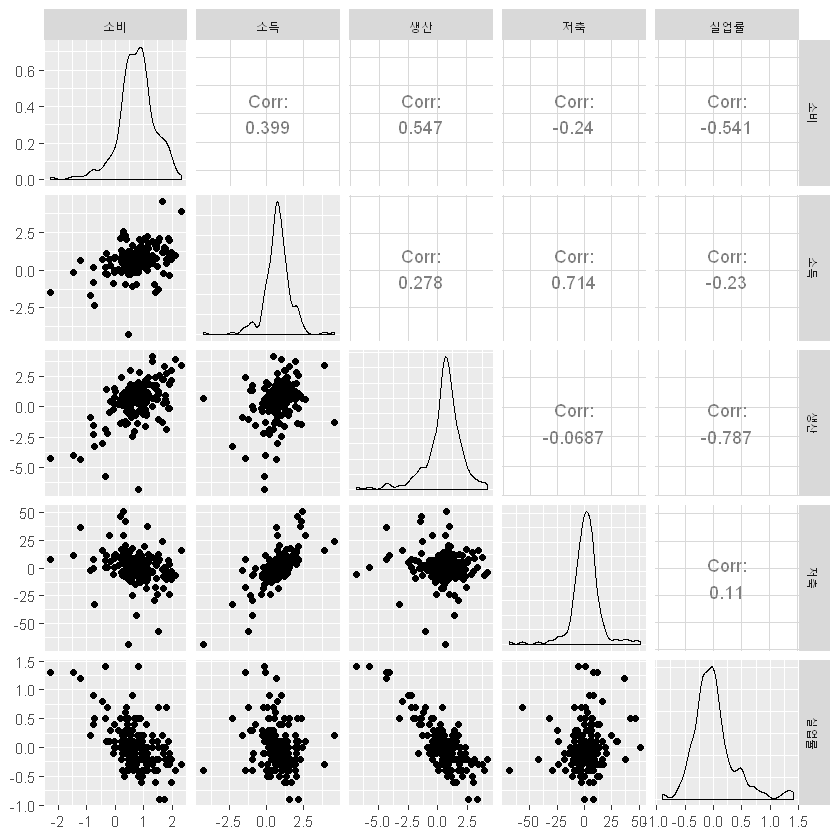

In [8]:
colnames(uschange) <- c("소비", "소득", "생산", "저축", "실업률")
uschange %>%
  as.data.frame() %>%
  GGally::ggpairs()

In [9]:
colnames(uschange) <- c("Consumption", "Income", "Production", "Savings", "Unemployment")

### 가정

첫 번째, 모델은 현실에 대한 타당한 근사식이고; 즉, 목표 예상변수(forecast variable)와 예측변수(predictor variable) 사이의 관계는 이러한 선형 관계식을 만족

두 번째, 오차(error)   에 대해 다음과 같은 가정
- 오차의 평균은 0입니다; 그렇지 않으면, 예측값이 체계적으로 편향될 것입니다.
- 오차에는 자기상관관계(autocorrelation)가 없습니다; 그렇지 않으면, 데이터에 악용될 수 있는 정보가 더 많아서 예측값이 비효율적으로 될 것입니다.
- 오차는 예측변수(predictor variable)와 상관관계(correlation)가 없습니다; 그렇지 않은 경우에는 모델의 체계적인 부분에 포함되어야 할 정보가 더 있을 수 있습니다.

## 5.2 최소 제곱 추정

최소 제곱 원리(least square principle)는 제곱 오차의 합을 최소화하여 계수를 효과적으로 선택할 수 있는 방법

\begin{align*}
 \sum_{t=1}^T \varepsilon_t^2 = \sum_{t=1}^T (y_t - \beta_{0} - \beta_{1} x_{1,t} - \beta_{2} x_{2,t} - \cdots - \beta_{k} x_{k,t})^2.
\end{align*}

추정된 계수를 언급할 때, 이러한  
\begin{align*}
\hat\beta_0, \dots, \hat\beta_k 
\end{align*} 
기호를 사용하여 나타낼 것입니다. 

tslm() 함수는 선형 회귀 모델을 시계열 데이터에 맞게 추가적인 기능 제공

### 예제: 미국 소비 지출


미국 소비 데이터를 다루는 다중 선형 회귀 모델

\begin{align*}
   y_t=\beta_0 + \beta_1 x_{1,t}+ \beta_2 x_{2,t}+ \beta_3 x_{3,t}+ \beta_4 x_{4,t}+\varepsilon_t,
\end{align*} 

y 는 실제 개인 소비 지출의 백분율 변화,  
x1은 실제 개인 가처분 소득의 백분율 변화,  
x2는 산업 생산의 백분율 변화, x3은 개인 저축의 백분율 변화,  
x4는 실업률 변화

다음의 출력은 적합 모델(fitted model)에 관한 정보

계수(coefficients)의 첫 번째 열은 각  β 계수의 추정   
두 번째 열은  β 의 표준 오차  
세 번째 열은 “t 값”은 추정된  β 계수와 표준 오차의 비율   
마지막  열은 추정된  β 계수가 원래 값만큼 클 확률

In [10]:
fit.consMR <- tslm(
  Consumption ~ Income + Production + Unemployment + Savings, 
  data=uschange)
summary(fit.consMR)


Call:
tslm(formula = Consumption ~ Income + Production + Unemployment + 
    Savings, data = uschange)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88296 -0.17638 -0.03679  0.15251  1.20553 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.26729    0.03721   7.184 1.68e-11 ***
Income        0.71449    0.04219  16.934  < 2e-16 ***
Production    0.04589    0.02588   1.773   0.0778 .  
Unemployment -0.20477    0.10550  -1.941   0.0538 .  
Savings      -0.04527    0.00278 -16.287  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3286 on 182 degrees of freedom
Multiple R-squared:  0.754,	Adjusted R-squared:  0.7486 
F-statistic: 139.5 on 4 and 182 DF,  p-value: < 2.2e-16


### 적합값

회귀식에서 추정된 계수를 사용하고 오차항을 0으로 두어  y의 예측값을 얻음.

\begin{equation}
  \hat{y}_t = \hat\beta_{0} + \hat\beta_{1} x_{1,t} + \hat\beta_{2} x_{2,t} + \cdots + \hat\beta_{k} x_{k,t}.
  \tag{5.2}
\end{equation}

다음의 그래프는 미국 소비 지출 시계열의 백분율 변화에 대해 적합값(fitted value)과 실제 값

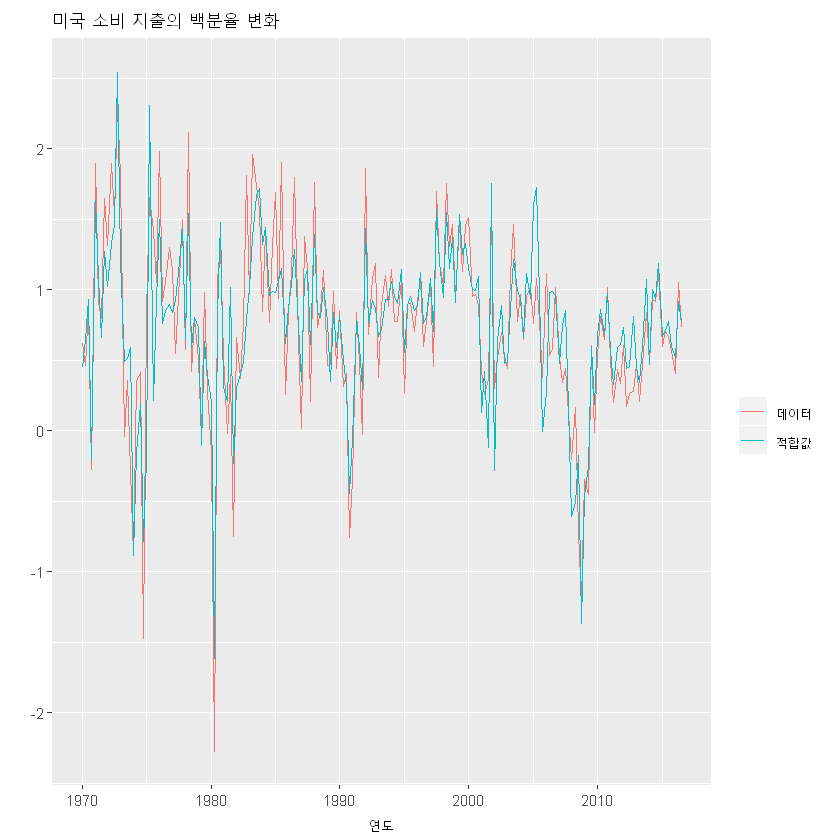

In [11]:
autoplot(uschange[,'Consumption'], series="데이터") +
  autolayer(fitted(fit.consMR), series="적합값") +
  xlab("연도") + ylab("") +
  ggtitle("미국 소비 지출의 백분율 변화") +
  guides(colour=guide_legend(title=" "))

Figure 5.6: 실제 미국 소비 지출과 예측된 미국 소비 지출의 시간 그래프.

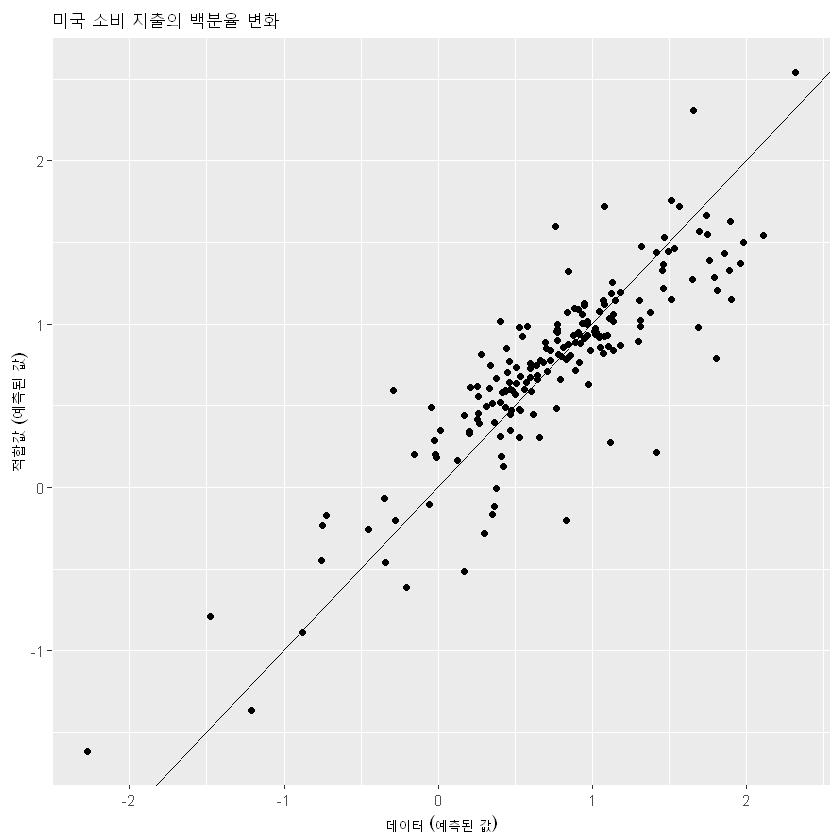

In [12]:
cbind(Data = uschange[,"Consumption"], 
      Fitted = fitted(fit.consMR)) %>%
  as.data.frame() %>%
  ggplot(aes(x=Data, y=Fitted)) +
    geom_point() +
    ylab("적합값 (예측된 값)") +
    xlab("데이터 (예측된 값)") +
    ggtitle("미국 소비 지출의 백분율 변화") +
    geom_abline(intercept=0, slope=1)

Figure 5.7: 미국 실제 소비 지출을 예측된 미국 소비 지출에 대해 나타낸 것.

### 적합도(Goodness-of-fit)

선형 회귀 모델이 데이터에 얼마나 잘 맞는지 요약하는 일반적인 방법은 결정 계수(coefficient of determination) 또는   R2 를 사용하는 것  

관측한  y 값과 예측한   ^y 값 사이의 상관 관계(correlation)의 제곱으로 계산

\begin{equation}
  R^2 = \frac{\sum(\hat{y}_{t} - \bar{y})^2}{\sum(y_{t}-\bar{y})^2},
\end{equation}

회귀 모델로 설명되는 목표 예상변수(forecast variable)의 변동 비율을 반영

예측값이 실제 값과 가깝다면,  R2 는 1에 가까울 것

###  회귀 분석의 표준 오차

모델이 데이터에 얼마나 잘 들어 맞았는지에 대한 또 다른 척도는 “잔차 표준 오차(residual standard error)”라고 하는 잔차(residual)의 표준 편차

\begin{equation}
  \hat{\sigma}_e=\sqrt{\frac{1}{T-k-1}\sum_{t=1}^{T}{e_t^2}}.
  \tag{5.3}
\end{equation}


k 는 모델에 포함된 예측변수(predictor variable)의 수

잔차(residual)를 계산할 때  k + 1 개의 매개변수(각 예측변수에 대한 절편과 계수)를 추정했기 때문에   T − k − 1 로 나누는 것에 주목

## 5.3 회귀 모델 평가

“잔차(residual)”로 정의

\begin{align*}
  e_t &= y_t - \hat{y}_t \\
      &= y_t - \hat\beta_{0} - \hat\beta_{1} x_{1,t} - \hat\beta_{2} x_{2,t} - \cdots - \hat\beta_{k} x_{k,t}
\end{align*}

각 잔차(residual)는 관련된 관측값의 예측할 수 없는 성분


잔차(residual)에는 다음 두 가지를 포함하여 몇 가지 유용한 성질

\begin{align*}
  \sum_{t=1}^{T}{e_t}=0 \quad\text{and}\quad \sum_{t=1}^{T}{x_{k,t}e_t}=0\qquad\text{for all $k$}.
\end{align*}

성질의 결과로, 잔차(residual)의 평균이 0이고 잔차(residual)와 예측변수(predictor variable)에 대한 관측값 사이의 상관관계(correlation)도 0이라는 것이 분명

회귀 변수를 고르고 회귀 모델을 맞춘 후에, 모델의 가정이 만족되는지 확인하기 위해 잔차를 그려보는 것이 필요합니다.  
적합 모델(fitted model)과 기본 가정의 서로 다른 측면을 확인하기 위해 그려야 할 여러 가지 그래프가 있습니다. 각각을 하나씩 살펴보겠습니다.

### 잔차의 ACF 그래프

추정된 모델 오차에서 자기상관관계(autocorrelation)가 없다는 가정을 위배하여 예측이 비효율적이며  더 나은 예측을 위해 모델에서 고려해야 할 정보가 더 있다는 것을 의미  

자기상관(autocorrelation)은 “잘못된” 것은 아니지만, 보통 필요한 것보다 더 큰 예측구간(prediction interval)을 갖으며, 항상 잔차의 ACF (AutoCorrelation Function) 그래프를 살펴야 함.

유용한 또 다른 방법은 브로이쉬-갓프레이(Breusch-Godfrey) 검정 ( 뒤에 나옴 )
: 작은 p-값은 잔차(residual)에 중요한 자기상관(autocorrelation)이 남아 있다는 것  

### 잔차의 히스토그램

잔차가 정규 분포를 따르는지 항상 확인하는 것은 좋은 접근 방식이며  이를 통해 예측 구간(prediction interval)을 훨씬 쉽게 계산 

### 예제

checkresiduals() 함수를 이용하여 위에서 언급한 유용한 잔차 진단 결과


	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 14.874, df = 8, p-value = 0.06163


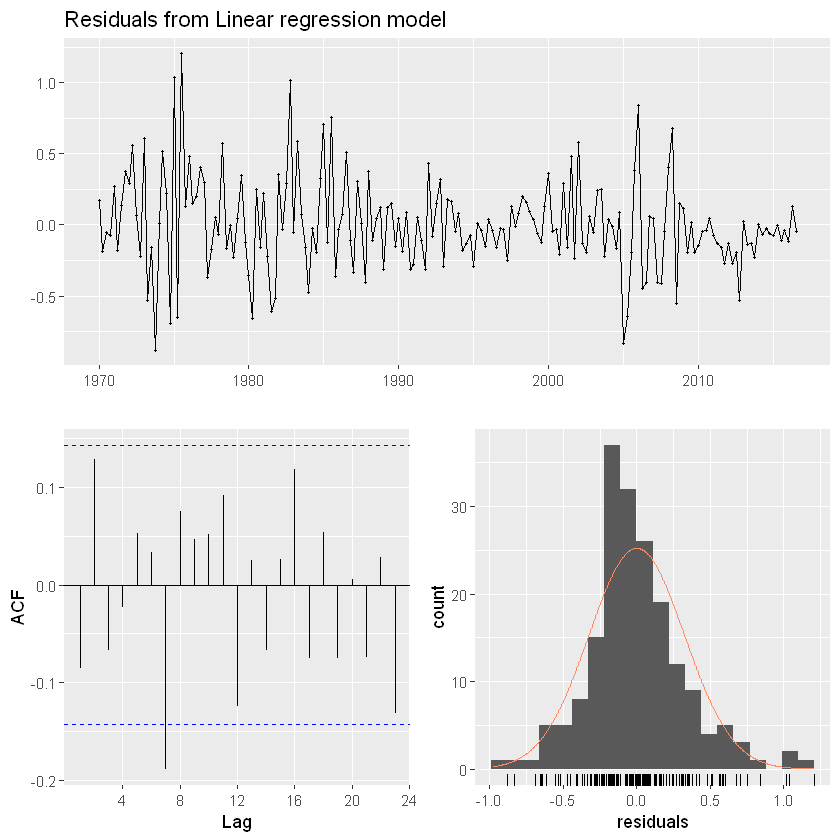

In [13]:
checkresiduals(fit.consMR)

# Figure 5.8: 미국 분기별 소비에 대한 회귀 모델로부터 얻은 잔차를 분석하기.

시간 그래프(time plot)에서 몇몇 부분은 시간에 따라 변하지만 나머지는 상대적으로 두드러지진 않습니다. 이러한 이분산성(heteroskedasticity)이 예측 구간 범위를 정확하지 않게 만들 수 있음

히스토그램은 잔차가 살짝 치우친 것 같다는 것을 보여줍니다. 이것은 예측 구간의 범위 확률에 영향을 줄 수도 있습니다.

자기상관(autocorrelation) 그래프에서는 시차 7에서 유의미하게 튀는 점이 나타나지만 브로이쉬-갓프레이(Breusch-Godfrey) 검정에서 5% 수준에 도달할만큼 유의미하지는 않습니다

 9 장에서는 잔차에 남아있는 정보를 더 잘 잡아내기 위해 사용하는 동적 회귀 모델(dynamic regression model)

### 예측변수에 대한 잔차 그래프

잔차가 체계적인 패턴을 보이지 않고 무작위로 흩뿌려진 형태로 나타나는 것이 좋고 
예측변수(predictor variable)에 대한 잔차(residual)의 산점도(scatterplot)를 살펴보는 것

이러한 산점도(scatterplot)에 패턴이 나타나면, 관계가 비선형적일 수 있어서 그에 따라 모델을 수정 필요.  (비선형 회귀를 다루는 5.8 절)

### 예제

그림 5.9에서 각 예측변수(predictor variable)에 대해 나타낸, 미국 소비 예측에 대한 다중 회귀 모델에서 얻은 잔차는 무작위적으로 흩뿌려진 것처럼 보임.

In [14]:
install.packages("gridExtra")
require('gridExtra')

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\RtmpK6q4ZV\downloaded_packages


Loading required package: gridExtra


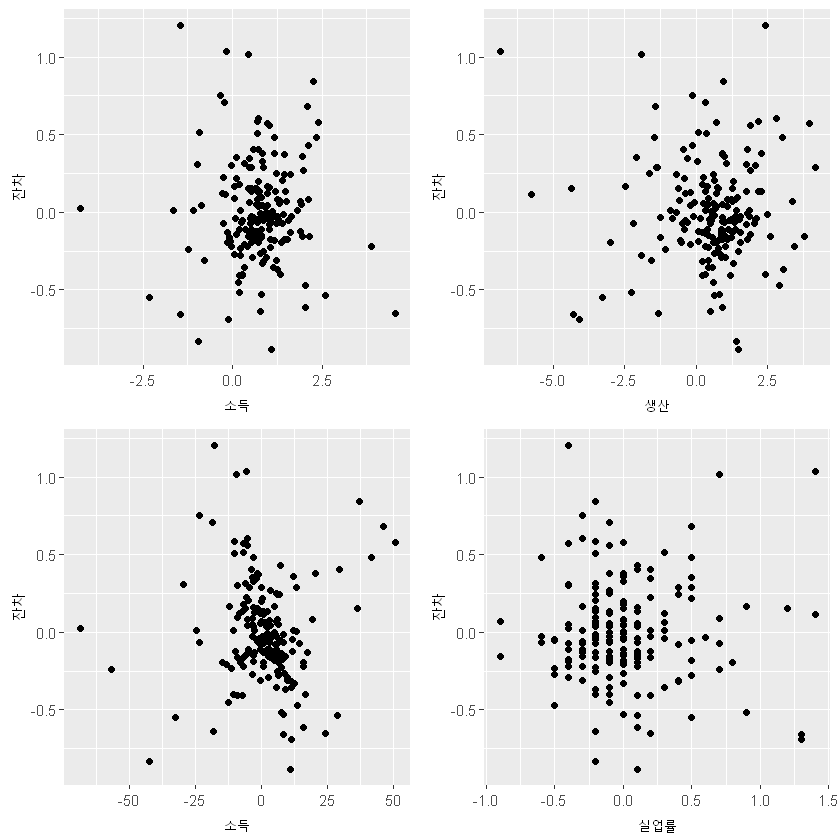

In [15]:
df <- as.data.frame(uschange)
df[,"Residuals"]  <- as.numeric(residuals(fit.consMR))
p1 <- ggplot(df, aes(x=Income, y=Residuals)) +
  geom_point() + xlab("소득") + ylab("잔차")
p2 <- ggplot(df, aes(x=Production, y=Residuals)) +
  geom_point() + xlab("생산") + ylab("잔차")
p3 <- ggplot(df, aes(x=Savings, y=Residuals)) +
  geom_point() + xlab("소득") + ylab("잔차")
p4 <- ggplot(df, aes(x=Unemployment, y=Residuals)) +
  geom_point() + xlab("실업률") + ylab("잔차")
gridExtra::grid.arrange(p1, p2, p3, p4, nrow=2)

# Figure 5.9: 잔차 대 각 예측변수의 산점도.

### 적합값에 대한 잔차 그래프

적합값에 대해 잔차를 그려도 어떠한 패턴도 나타나지 않아야 합니다.

패턴을 보았다면, 오차에 “이분산성(heteroscedasticity)”이 있을 수 있으며, 목표 예상변수(forecast variable)에 로그나 제곱근 같은 변환을 취해야 할 수도 있음.

#### 예제

이전 예제의 연장선상에서, 그림 5.10 은 잔차를 적합값에 대해 나타냅니다. 무작위 산점도는 오차에 등분산성(homoscedasity)이 있다는 것을 말해줍니다.

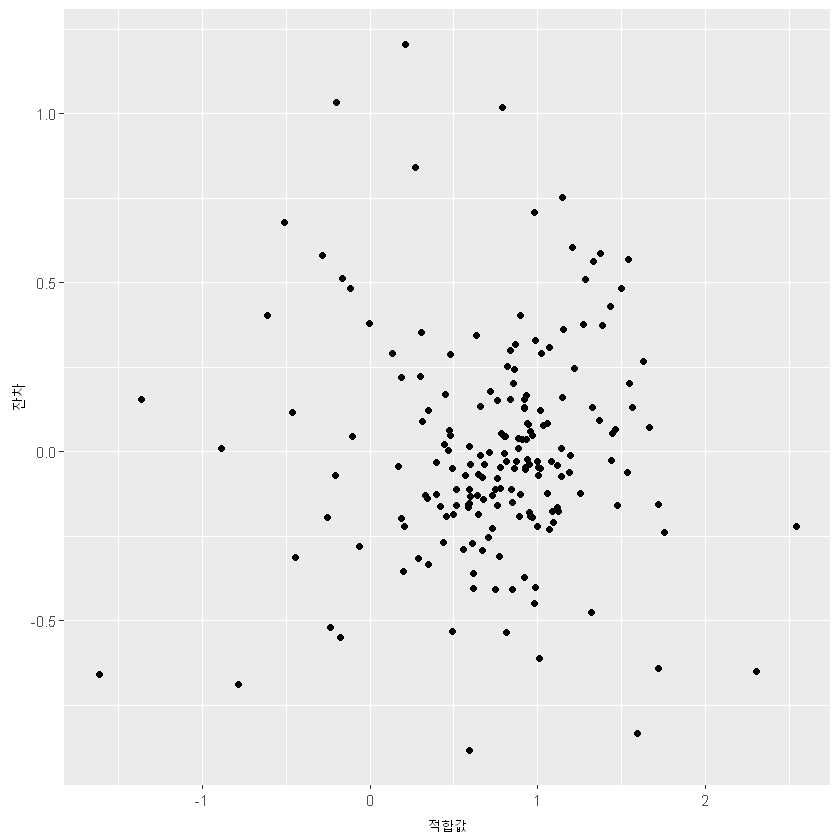

In [16]:
cbind(Fitted = fitted(fit.consMR), 
      Residuals = residuals(fit.consMR)) %>%
  as.data.frame() %>%
  ggplot(aes(x=Fitted, y=Residuals)) + geom_point() +
    xlab("적합값") + ylab("잔차")

#Figure 5.10: 잔차 대 적합값의 산점도.

### 이상값과 영향력 있는 관측값

대다수의 데이터에 비해 극단적인 값을 갖는 관측값을 이상값(outliers)

회귀 모형의 추정된 계수에 큰 영향을 주는 관측값을 영향력 있는 관측값

이상값과 영향력 있는 관측값을 찾아내는 형식적인 방법이지만, 각  x 에 대해  y 를 산점도로 나타내는 것은 항상 회귀 분석의 좋은 시작점

이상값이 나타나는 한 가지 원인은 데이터 입력 실수

몇몇 관측값이 단순히 다를 때도 이상값이 나타납니다. 이 경우에는, 이러한 관측값을 제거하는 것이 현명하지 않을 수 있습니다. 원인 파악이 중요 

#### 예제

그림 5.11은 소득에 대한 미국 소비 데이터(5.1 절에서 소개한 예제)에 회귀를 적용했을 때

Figure 5.11: 회귀에서 이상값과 영향력 있는 관측값의 효과.
![](https://otexts.com/fppkr/fpp_files/figure-html/outlier-1.png)

### 허위회귀(Spurious regression)

시계열 데이터에 “정상성(stationarity)이 나타나지 않습니다”; 즉, 시계열의 값이 일정한 평균이나 일정한 분산으로 변하지 않습니다

정상성(stationarity)이 나타나지 않는 데이터가 회귀 모델에 어떤 영향을 미칠 수 있는지 설명  
예를 들어, 그림 5.12의 두 변수를 살펴봅시다. 둘 다 같은 방식으로 상향 추세이기 때문에 단순하게 관련 있는 것처럼 보입니다. 하지만, 호주의 승객 수송량은 기니의 쌀 생산량과 관련이 없습니다.   

Figure 5.12: 호주 항공객에 대한 기니의 쌀 생산량을 회귀로 분석한 예제에서 볼 수 있는 것처럼, 추세가 있는 시계열 데이터는 관계 있는 것처럼 보일 수 있습니다.

![](https://otexts.com/fppkr/fpp_files/figure-html/spurious-1.png)

정상성을 나타내지 않는 시계열을 회귀 분석하는 것은 허위회귀(spurious regression)로 이어질 수 있음.

기니의 쌀 생산량에 대한 호주 항공객의 회귀 분석 결과는 그림 5.13에 나타낸 것과 같습니다. 높은  R2 와 높은 잔차(residual) 자기 상관은 허위회귀(spurious regression)라는 것을 나타내는 신호

허위 회귀의 사례는 그럴듯한 단기 예측값을 주는 것처럼 보일 수 있지만, 미래에도 계속 일반적으로 작동하지는 않을 것입니다.

In [17]:
aussies <- window(ausair, end=2011)
fit <- tslm(aussies ~ guinearice)
summary(fit)


Call:
tslm(formula = aussies ~ guinearice)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9448 -1.8917 -0.3272  1.8620 10.4210 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.493      1.203  -6.229 2.25e-07 ***
guinearice    40.288      1.337  30.135  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.239 on 40 degrees of freedom
Multiple R-squared:  0.9578,	Adjusted R-squared:  0.9568 
F-statistic: 908.1 on 1 and 40 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 28.813, df = 8, p-value = 0.000342


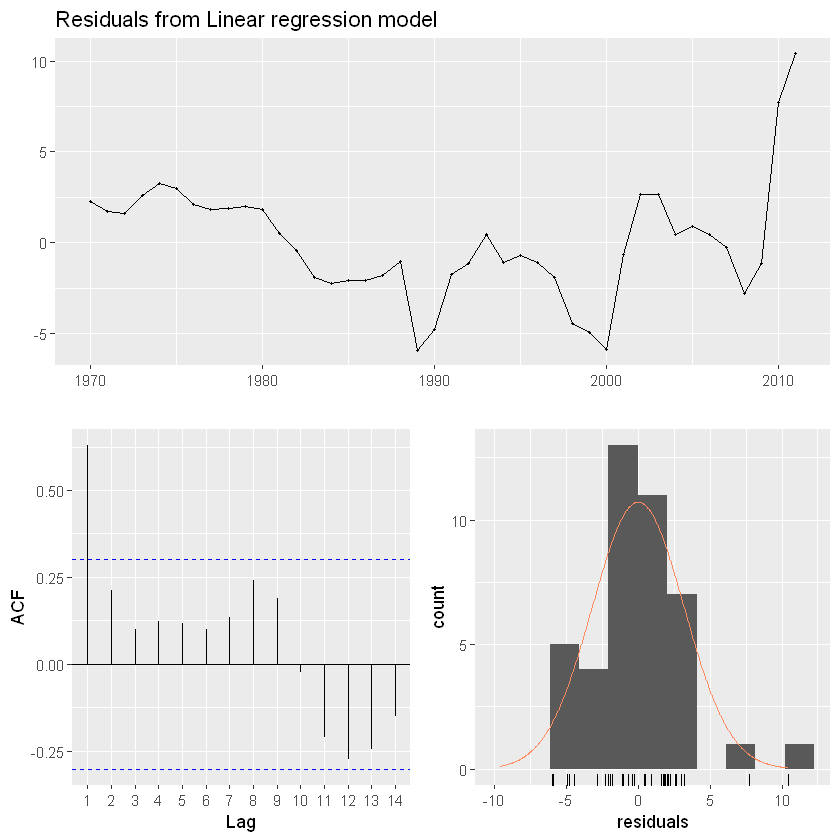

In [18]:
checkresiduals(fit)

# Figure 5.13: 허위회귀로부터 얻은 잔차.

## 5.4 몇 가지 유용한 예측변수

###  추세

시계열 데이터에 추세가 나타나는 것은 흔한 일

선형 추세는 다음과 같이 단순히  
x1 t = t  를 예측변수(predictor variable)로 사용하여 모델링

\begin{align*}
  y_{t}= \beta_0+\beta_1t+\varepsilon_t,
\end{align*}

여기에서  
t = 1 , … , T

 tslm() 함수에서 trend 예측변수(predictor variable)를 사용하여 추세 변수를 정함.

### 가변수

 예측변수(predictor variable)가 두 가지 값만 갖는(예를 들면, “예”와 “아니오”) 범주형(categorical) 변수일 때
 
 이 상황도 다중 회귀 모델의 틀에서 1을 “예”로 0을 “아니오”로 갖는 “가변수(dummy variable)”를 만들어 다룰 수 있습니다. 모의 변수를 “지표 변수(indicator variable)”
 
가변수(dummy variable)는 데이터의 이상값(outlier)을 설명할 때도 사용

이 경우에, 가변수는 이러한 관측치에 대해 1 이외에는 0입니다. 특별한 사건이 일어나는 경우도 한 가지 예가 됩니다. 예를 들어, 브라질에 방문하는 여행자를 예측하는 상황에서는, 2016년에 열린 리우 올림픽 효과를 고려할 필요가 있을 것입니다.

세 개 이상의 범주가 있을 때는, 변수를 (전체 범주의 수보다 1만큼 작은) 몇 가지 가변수(dummy variable)로 부호화

### 계절성 가변수

일별 데이터를 예측하고 있고 요일을 고려하고 싶을때 사용.

7개의 범주를 부호화하기 위해 6개의 가변수(dummy variable)만 필요하다는 것에 주목
모든 가변수를 0으로 둘 때, 절편이 7번째 범주( 일요일 )

![](dummy01.JPG)

분기별 데이터에서는 3개의 가변수를, 월별 데이터에서는 11개의 가변수

예측변수(predictor variable) season을 명시하면 tslm() 함수는 자동으로 처리

#### 예제: 호주 분기별 맥주 생산량

그림 5.14에 있는 호주 분기별 맥주 생산량 데이터

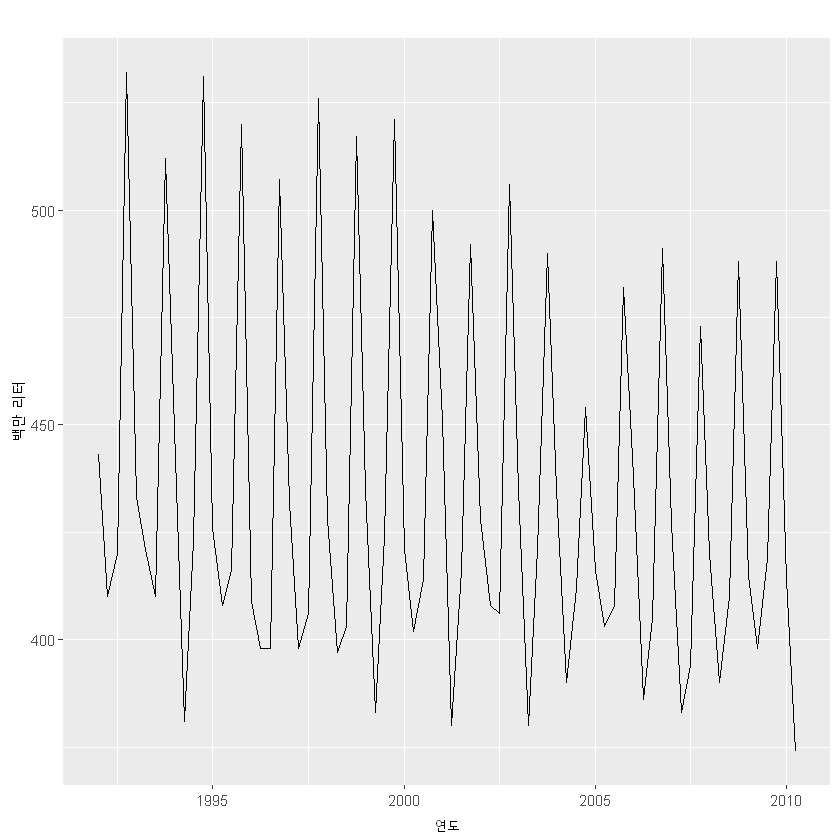

In [19]:
beer2 <- window(ausbeer, start=1992)
autoplot(beer2) + xlab("연도") + ylab("백만 리터")

## Figure 5.14: 호주 분기별 맥주 생산량.

미래의 맥주 생산량 값을 예측하려고 합니다. 선형 추세와 분기별 가변수(dummy variable)를 고려하는 회귀 모델로 이 데이터를 다음과 같이 모델링

\begin{align*}
  y_{t} = \beta_{0} + \beta_{1} t + \beta_{2}d_{2,t} + \beta_3 d_{3,t} + \beta_4 d_{4,t} + \varepsilon_{t},
\end{align*}

t 가 분기 i 이면 d it = 1 이고, 아니면 0입니다. 첫 번째 분기 변수는 생략되었기 때문에, 다른 분기와 관계된 계수는 첫 번째 분기와 다른 분기와의 차이

In [20]:
fit.beer <- tslm(beer2 ~ trend + season)
summary(fit.beer)


Call:
tslm(formula = beer2 ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.903  -7.599  -0.459   7.991  21.789 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 441.80044    3.73353 118.333  < 2e-16 ***
trend        -0.34027    0.06657  -5.111 2.73e-06 ***
season2     -34.65973    3.96832  -8.734 9.10e-13 ***
season3     -17.82164    4.02249  -4.430 3.45e-05 ***
season4      72.79641    4.02305  18.095  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared:  0.9243,	Adjusted R-squared:  0.9199 
F-statistic: 210.7 on 4 and 69 DF,  p-value: < 2.2e-16


trend와 season은 객체가 아니라는 것에 주목하시길 바랍니다; 이러한 방식으로 명시할 때 tslm()에서 이것을 자동으로 생성

분기별 -0.34 백만리터 값에 평균적인 하향 추세가 있습니다. 평균적으로, 2번째 분기는 생산량이 첫 번째 분기보다 34.7 백만리터 작고, 3번째 분기는 첫 번째 분기보다 17.8 백만리터 작고, 4번째 분기는 첫 번째 분기보다 72.8 백만리터 큽니다.

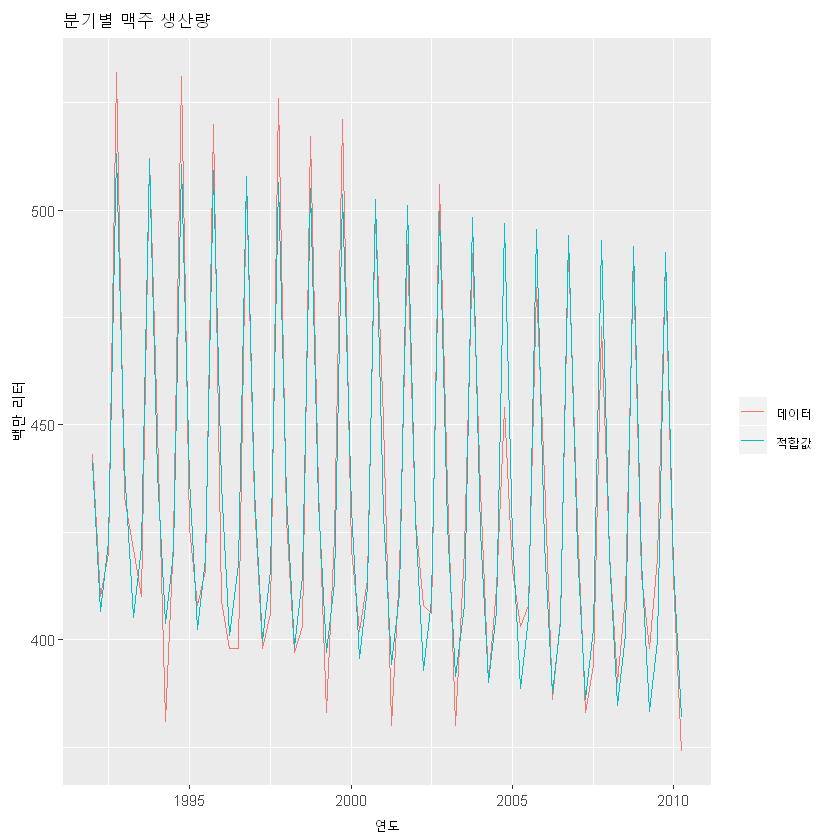

In [21]:
autoplot(beer2, series="데이터") +
  autolayer(fitted(fit.beer), series="적합값") +
  xlab("연도") + ylab("백만 리터") +
  guides(colour=guide_legend(title=" ")) +
  ggtitle("분기별 맥주 생산량")

## Figure 5.15: 맥주 생산량과 예측된 맥주 생산량의 시간 그래프.

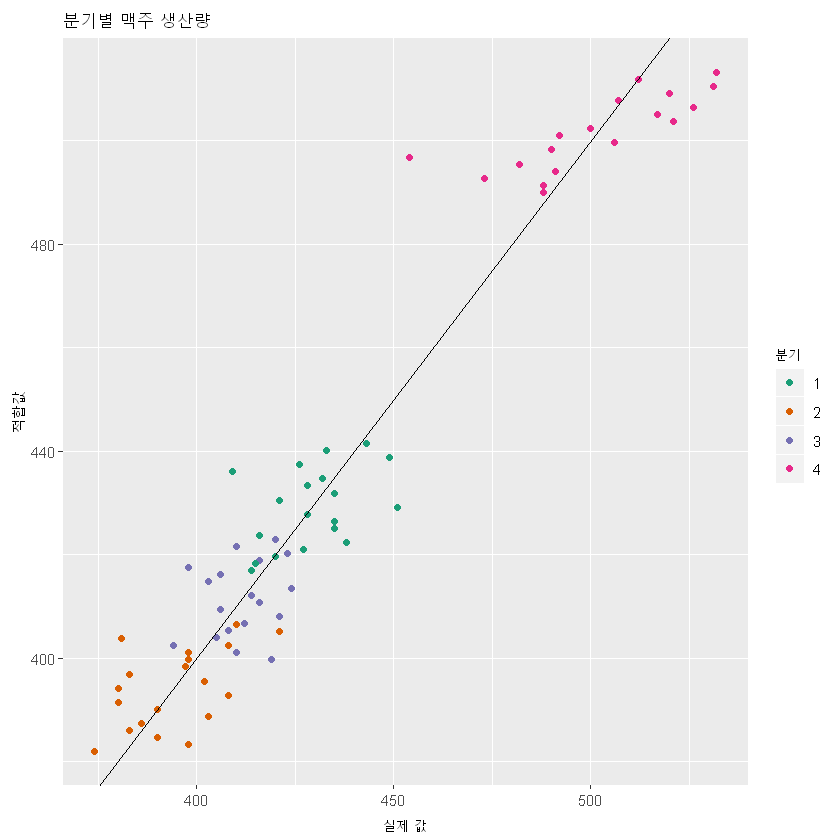

In [22]:
cbind(Data=beer2, Fitted=fitted(fit.beer)) %>%
  as.data.frame() %>%
  ggplot(aes(x = Data, y = Fitted, 
             colour = as.factor(cycle(beer2)))) +
    geom_point() +
    ylab("적합값") + xlab("실제 값") +
    ggtitle("분기별 맥주 생산량") +
    scale_colour_brewer(palette="Dark2", name="분기") +
    geom_abline(intercept=0, slope=1)

## Figure 5.16: 실제 맥주 생산량을 예측된 맥주 생산량에 대해 나타낸 것.

### 개입 변수

예측하려는 변수에 영향을 줄 수도 있는 개입(intervention)값을 모델링하는 것이 종종 필요  
예를 들면, 경쟁자의 활동, 광고 지출, 산업 행동 

효과가 한 주기만 지속될 때는, “스파이크(spike)” 변수를 사용합니다. 이것은 개입 기간에는 1로 두고 그 외에는 0으로 두는 가변수(dummy variable)

### 거래일

매월 거래일의 날짜 수는 많이 변할 수 있고 판매량 데이터에 상당한 영향  
각 월의 거래일 수를 예측변수로 포함 필요.

월별이나 분기별 데이터에 대해, bizdays() 함수가 각 주기 안에 있는 거래일 수를 계산

주마다 날짜 수가 다른 효과를 고려할 때는 다음과 같은 예측변수(predictor variable)

\begin{align*}
  x_{1} &= \text{월의 월요일 수;} \\
  x_{2} &= \text{월의 화요일 수;} \\
        & \vdots \\
  x_{7} &= \text{월의 일요일 수.}
\end{align*}

### 분포된 시차 값

광고 지출을 예측변수(predictor variable)로 넣는 것은 종종 유용  
하지만, 광고 효과는 실제 캠페인 기간보다 오래 갈 수 있기 때문에, 광고 지출의 시차값(lagged value)을 넣을 필요

따라서 다음과 같은 예측변수(predictor variable)가 유용

\begin{align*}
  x_{1} &= \text{이전 달의 광고 지출;} \\
  x_{2} &= \text{이전 2개월 동안 광고 지출;} \\
        & \vdots \\
  x_{m} &= \text{이전 $m$개월 동안 광고 지출.}
\end{align*}

### 부활절

부활절은 매년 날짜가 다르고 효과가 며칠 동안 지속될 수 있기 때문에 대부분의 휴일과는 다릅니다

이 경우에는, 특정 기간에 속하면 가변수(dummy variable)를 1로, 그 외에는 0으로 설정


월별 데이터에서, 부활절이 3월이면 3월에 가변수(dummy variable) 1을 두고 4월이면 4월에 가변수(dummy variable) 1을 두고, 3월에 시작하여 4월에 끝날 때는 가변수(dummy variable)를 월 사이에 비례하여 나눕니다.

easter() 함수가 가변수(dummy variable)를 계산

### 푸리에 급수

계절성 가변수(seasonal dummy variable) 대신에, 긴 계절성 주기(seasonal period)에 대해서는 특별히, 푸리에 항(Fourier term)을 사용

m이 계절성 주기(seasonal period)라면, 처음 몇 개의 푸리에 항(Fourier term)은 다음과 같이 주어집니다.

\begin{align*}
x_{1,t} = \sin\left(\textstyle\frac{2\pi t}{m}\right),
  x_{2,t} = \cos\left(\textstyle\frac{2\pi t}{m}\right),
  x_{3,t} = \sin\left(\textstyle\frac{4\pi t}{m}\right),
  x_{4,t} = \cos\left(\textstyle\frac{4\pi t}{m}\right),
  x_{5,t} = \sin\left(\textstyle\frac{6\pi t}{m}\right),
  x_{6,t} = \cos\left(\textstyle\frac{6\pi t}{m}\right),
\end{align*}

푸리에 항(Fourier term)이 있으면, 가변수(dummy variable)가 있는 경우에 필요한 예측변수(predictor variable)보다 (특히  m 이 클 때) 종종 적은 수의 예측변수(predictor variable)를 사용

예를 들어,  m ≈ 52 인 주별 데이터에 대해 이러한 장점이 유용  
짧은 계절성 주기를 다룰 때는(예를 들면, 분기별 데이터), 계절성 가변수(dummy variable)에 대해 푸리에 항(Fourier term)을 사용해도 딱히 좋은 점이 없음

In [23]:
fourier.beer <- tslm(beer2 ~ trend + fourier(beer2, K=2))
summary(fourier.beer)


Call:
tslm(formula = beer2 ~ trend + fourier(beer2, K = 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-42.903  -7.599  -0.459   7.991  21.789 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               446.87920    2.87321 155.533  < 2e-16 ***
trend                      -0.34027    0.06657  -5.111 2.73e-06 ***
fourier(beer2, K = 2)S1-4   8.91082    2.01125   4.430 3.45e-05 ***
fourier(beer2, K = 2)C1-4  53.72807    2.01125  26.714  < 2e-16 ***
fourier(beer2, K = 2)C2-4  13.98958    1.42256   9.834 9.26e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared:  0.9243,	Adjusted R-squared:  0.9199 
F-statistic: 210.7 on 4 and 69 DF,  p-value: < 2.2e-16


fourier()의  두 번째 입력 K으로 사인과 코사인 항을 몇 개 넣을 지정

K = m / 2 까지 정할 수 있습니다. 여기에서  m 은 계절성 주기

##  5.5 예측변수 선택

가능한 예측변수(predictor variable)가 많이 있을 때는, 회귀 모델에서 사용할 가장 좋은 예측변수(predictor variable)를 선택하는 몇 가지 전략이 필요

유효하지 않은 접근방법
1. 목표 예상변수(forecast variable)를 특정한 예측변수(predictor variable)에 대해 그래프로 나타내서 눈에 띄는 관계가 없는 경우에 버리는 것
2. 모든 예측변수(predictor variable)에 대해 다중 선형 회귀 분석을 하여 p-값들이 0.05보다 큰 모든 변수를 무시


5가지 예측 정확도 측정량을 사용  
CV() 함수를 사용하여 이러한 값을 계산

In [24]:
# 미국 소비 데이터에 모델을 적용
CV(fit.consMR)

CV          AIC         AICc          BIC        AdjR2 
   0.1163477 -409.2980298 -408.8313631 -389.9113781    0.7485856

 CV, AIC, AICc, BIC 값은 가장 낮은 모델이 좋고  
R2 경우에는  값이 가장 높은 모델 좋음.

### 조정된 R2

모델의 예측 능력을 측정하는 좋은 방법이 아닙니다. 

R2는 “자유도(degree of freedom)”를 허용하지 않습니다. 어떤 변수를 추가하면 변수가 적합하지 않더라도 R2의 값이 증가하는 경향

제곱 오차의 최소 합(SSE)

\begin{align*}
 \text{SSE} = \sum_{t=1}^T e_{t}^2.
\end{align*}

SSE를 최소화하는 것은  R2를 최대화하는 것과 같고, 항상 변수가 가장 많은 모델을 선택할 것이므로 예측변수(predictor variable)를 선택하는 올바른 방법이 아닙니다

이러한 문제를 해결하기 위해 설계된 방법은 (“R-바-제곱(R-bar-squared)”이라고도 부르는) 조정된  R2
 
\begin{align*}
   \bar{R}^2 = 1-(1-R^2)\frac{T-1}{T-k-1},
\end{align*}

T는 관측값의 수이고 k는 예측변수(predictor variable)의 수  
가장 큰값을 갖는 모델이 좋은 모델이며, 표준 오차  ^σ를 최소화하는 것과 같음.

### 교차검증

회귀 모델에서 예측변수(predictor variable)를 선택하기 위해 고전적인 단일 관측치 제거법(leave-one-out) 교차검증을 사용하는 것도 가능

사용 과정

<ol style="list-style-type: decimal">
<li>관측값 <span class="math inline">\(t\)</span>를 데이터 모음에서 제거하고, 모델로 나머지 데이터를 맞춥니다. 그리고 생략한 관측값에 대한 오차(<span class="math inline">\(e_{t}^*=y_{t}-\hat{y}_{t}\)</span>)를 계산합니다. <span class="math inline">\(\hat{y}_{t}\)</span> 값을 추정할 때 <span class="math inline">\(t\)</span>번째 관측값이 사용되지 않았기 때문에 잔차와 같지 않습니다.)</li>
<li><span class="math inline">\(t=1,\dots,T\)</span>에 대해 1번 과정을 반복합니다.</li>
<li><span class="math inline">\(e_{1}^*,\dots,e_{T}^*\)</span>로부터 MSE를 계산합니다. 이것을 CV라고 부르겠습니다.</li>
    
CV가 가장 작은 모델이 가장 좋은 모델임. 

### 아카이케의 정보 기준

아카이케의 정보 기준입니다(Akaike’s Information Criterion; AIC)


\begin{align*}
   \text{AIC} = T\log\left(\frac{\text{SSE}}{T}\right) + 2(k+2),
\end{align*}

T 는 추정에 사용하는 관측값의 수이고  k는 모델에 있는 예측변수(predictor variable)의 수

예측변수(predictor variable)에 대한  k개의 계수, 절편, 잔차에 대한 분산 때문에  k + 2 개  
추정할 필요가 있는 매개변수의 수로 모델을 맞추는 작업(SSE)에 제한을 거는 것이 여기에서 기본적인 개념 

### 수정된 아카이케의 정보 기준

작은  T 값들의 경우에, AIC는 예측변수(predictor variable)를 너무 많이 고르는 경향이 있어서 다음과 같이 편향을 수정한 AIC를 사용

\begin{align*}
  \text{AIC}_{\text{c}} = \text{AIC} + \frac{2(k+2)(k+3)}{T-k-3}.
\end{align*}

### 슈바르츠의 베이지안 정보 기준

관련된 측정량은 (종종 SBIC, BIC, 또는 SC라는 약자로 사용합니다) 슈바르츠(Schwarz)의 베이지안(Bayesian) 정보 기준

\begin{align*}
   \text{BIC} = T\log\left(\frac{\text{SSE}}{T}\right) + (k+2)\log(T).
\end{align*}

BIC로 고른 모델은 AIC로 고른 것이나 더 적은 수의 항을 고려한 것과 같음.   
BIC가 AIC보다 매개변수의 수에 더 큰 제한을 주기 때문

### 어떤 양을 사용해야 합니까?

조정된 R2이 널리 사용되고, 다른 양보다 더 오래되었지만, 이 양은 너무 많은 예측변수(predictor variable)를 고르는 경향이 있어서 예측 작업에 덜 적합합니다.

결과적으로, 여기에서는 예측을 목적으로 하는 (큰  T 값에 대해 동등한 모델을 내는) AICc, AIC, 또는 CV 통계를 주로 사용하겠습니다.

#### 예제: 미국 소비

미국 소비 예측 다중 회귀 예제에서 4개의 예측변수(predictor variable)를 고려
결과를 AICc에 따라서 정렬하였습니다. 그러므로 가장 좋은 모델이 표의 맨 위에 놓이고 가장 나쁜 모델이 표의 맨 아래에 놓입니다.


![](dummy02.JPG)

가장 좋은 모델이 4개의 예측변수(predictor variable)를 모두 포함   
하지만 처음 네 행의 모델과 그 아래에 있는 모델이 분명하게 구분됩니다.   
이것은 소득과 저축이 생산과 실업률보다 더 중요한 변수라는 것을 나타냅니다. 또한, 처음 두 행에서 CV, AIC, 및 AICc 값이 거의 같습

###  단계적 회귀

후진 단계적 회귀(backwards stepwise regression)는 꽤 잘 들어맞는 접근 방식

- 모든 잠재적인 예측변수(predictor variable)를 포함하는 모델부터 시작합니다.
- 한 번에 하나의 예측변수(predictor variable)를 제거합니다. 이렇게 하여 예측 정확도가 나아지면 모델을 유지합니다.
- 더 나아지지 않을 때까지 반복합니다.

잠재적인 예측변수(predictor variable)가 너무 많으면, 후진 단계적 회귀(backwards stepwise regression)가 작동하지 않을 것이고 대신에 전진 단계적 회귀(forward stepwise regression)를 사용할 수 있습니다.



## 5.6 회귀로 예측하기



### 사전 예측 대 사후 예측

사전 예상값(Ex-ante forecast)은 미리 쓸 수 있는 정보만으로 내는 것

사후 예상값(Ex-post forecast)은 예측변수(predictor variable)에 대한 이후 정보로 내는 것

### 예제: 호주 분기별 맥주 생산량

사전 예상값을 낼 때 예측변수(predictor variable)의 실제 미래 값을 쓸 수 없습니다. 왜냐하면 예측변수(predictor variable)의 값을 미리 알 수 없기 때문

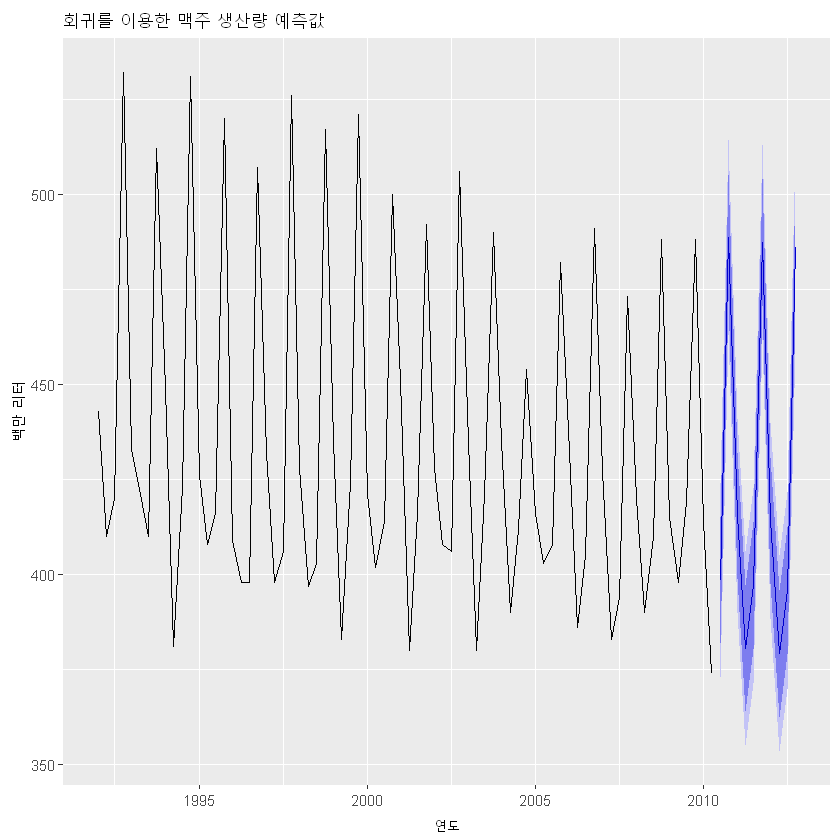

In [25]:
beer2 <- window(ausbeer, start=1992)
fit.beer <- tslm(beer2 ~ trend + season)
fcast <- forecast(fit.beer)
autoplot(fcast) +
  ggtitle("회귀를 이용한 맥주 생산량 예측값") +
  xlab("연도") + ylab("백만 리터")

## Figure 5.17: 맥주 생산량에 대한 회귀 모델로부터 얻은 예측값.
## 상대적으로 어두운 음영 영역은 80% 예측구간(prediction interval)이고 
## 상대적으로 밝은 음영 영역은 95% 예측구간(prediction interval)입니다.

### 시나리오 기반 예측

예측하는 사람은 관심 있는 예측변수(predictor variable)에 대한 가능한 시나리오를 가정  
예를 들어, 미국 정책 담당자는 고용률 변화 없이 소득과 저축에 대해 각각 1%와 0.5%의 지속적인 성장이 일어나는 것과, 각각 1%와 0.5%의 감소가 일어나는 상황에서 소비에서 예측된 변화량을 표본 이후 각 네 분기에 대해 비교하는 일에 관심이 있을 수 있습니다. 결과 예측치를 계산

In [26]:
fit.consBest <- tslm(Consumption ~ Income + Savings + Unemployment, 
  data = uschange)
h <- 4
newdata <- data.frame(
    Income = c(1, 1, 1, 1), 
    Savings = c(0.5, 0.5, 0.5, 0.5), 
    Unemployment = c(0, 0, 0, 0))
fcast.up <- forecast(fit.consBest, newdata = newdata)
newdata <- data.frame(
    Income = rep(-1, h), 
    Savings = rep(-0.5, h), 
    Unemployment = rep(0, h))
fcast.down <- forecast(fit.consBest, newdata = newdata)

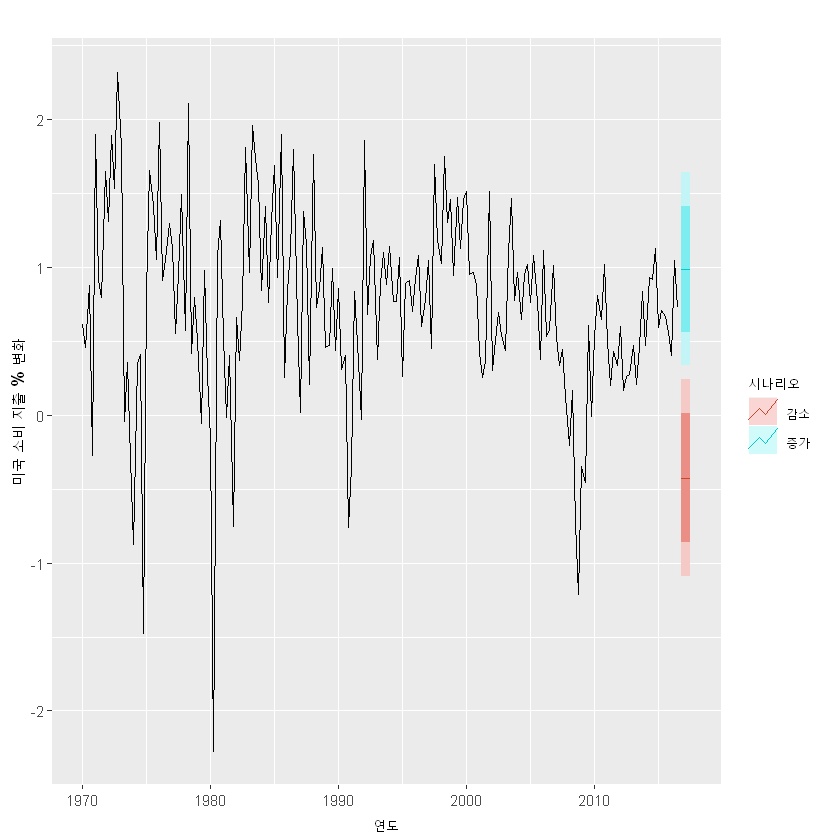

In [28]:
autoplot(uschange[,1]) +
  ylab("미국 소비 지출 % 변화") +
  autolayer(fcast.up, PI = TRUE, series = "증가") +
  autolayer(fcast.down, PI = TRUE, series = "감소") +
  guides(colour=guide_legend(title = "시나리오")) +
  xlab("연도")
## Figure 5.18: 시나리오 기반 예측으로 미국 개인 소비 지출 백분율 변화 예측하기.